In [324]:
import pandas as pd
import re
import numpy as np
from bs4 import BeautifulSoup as bs4
import urllib as ul
import matplotlib.pyplot as plt

In [289]:
seasonum={
    0:"winter",
    1:"spring",
    2:"summer",
    3:"authumn"
}

In [290]:
eq_req=ul.request.Request("https://en.wikipedia.org/wiki/List_of_deadly_earthquakes_since_1900")

eq_res = ul.request.urlopen(eq_req)

eq_txt = eq_res.read()

eq_soup = bs4(eq_txt, 'html.parser')

In [291]:
eq_soup.prettify

<bound method Tag.prettify of <!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of deadly earthquakes since 1900 - Wikipedia</title>
<script>document.documentElement.className = document.documentElement.className.replace( /(^|\s)client-nojs(\s|$)/, "$1client-js$2" );</script>
<script>(window.RLQ=window.RLQ||[]).push(function(){mw.config.set({"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"List_of_deadly_earthquakes_since_1900","wgTitle":"List of deadly earthquakes since 1900","wgCurRevisionId":810533305,"wgRevisionId":810533305,"wgArticleId":11673441,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles needing additional references from July 2017","All articles needing additional references","Articles needing cleanup from July 2017","All pages needing cleanup","Cleanup tagged articles with a reason field from Jul

In [292]:
eq_soup.title

<title>List of deadly earthquakes since 1900 - Wikipedia</title>

<table class="sortable wikitable">

In [293]:
eq_soup.title.name

'title'

In [294]:
eq_soup.title.string

'List of deadly earthquakes since 1900 - Wikipedia'

In [295]:
eq_soup.title.parent.name

'head'

In [296]:
eq_soup.p

<p>The following list compiles known <a class="mw-redirect" href="/wiki/Earthquakes" title="Earthquakes">earthquakes</a> that have caused one or more <a href="/wiki/Death" title="Death">fatalities</a> since 1900. The list incorporates high quality earthquake source (i.e., origin time, <a href="/wiki/Earthquake_location" title="Earthquake location">location</a> and <a class="mw-redirect" href="/wiki/Earthquake_magnitude" title="Earthquake magnitude">earthquake magnitude</a>) and <a href="/wiki/Death" title="Death">fatality</a> information from several sources.</p>

In [297]:
eq_soup.a

<a id="top"></a>

In [298]:
eq_wkt=eq_soup.find("table", class_="sortable wikitable")

In [299]:
eq_wkt

<table class="sortable wikitable">
<tr bgcolor="#CCCCCC">
<th width="22%">Origin (<a class="mw-redirect" href="/wiki/UTC" title="UTC">UTC</a>)</th>
<th width="33%">Present-day country and link to Wikipedia article</th>
<th width="10%"><a href="/wiki/Latitude" title="Latitude">Lat</a></th>
<th width="10%"><a href="/wiki/Longitude" title="Longitude">Long</a></th>
<th width="8%">Depth (<a class="mw-redirect" href="/wiki/Km" title="Km">km</a>)</th>
<th width="6%">Magnitude</th>
<th width="9%">Secondary Effects</th>
<th width="10%">PDE Shaking Deaths</th>
<th width="10%">PDE Total Deaths</th>
<th width="10%">Utsu Total Deaths</th>
<th width="10%">EM-DAT Total Deaths</th>
<th width="12%">Other Source Deaths</th>
</tr>
<tr>
<td>1900-05-11 17:23</td>
<td>Japan</td>
<td>38.700</td>
<td>141.100</td>
<td>5</td>
<td>7.0 <a class="mw-redirect" href="/wiki/Seismic_scale#Mjma" title="Seismic scale"><span title="JMA mag.">M<sub>JMA</sub></span></a></td>
<td></td>
<td></td>
<td></td>
<td></td>
<td></td

In [300]:
eq_wkr=eq_wkt.find_all('tr')

# eq_wkr

In [301]:
eq_wkrow=[]
for row in eq_wkr:
    cells = row.find_all('td')
    cells = [ele.text.strip() for ele in cells]
    eq_wkrow.append(cells)

In [302]:
eq_wkhd=[]
# for hd in eq_wkt:
heads=eq_wkt.find_all('th')
heads

heads=[ele.text.strip() for ele in heads]
print(heads)
#     eq_wkhd.append(heads)
#     eq_hd=pd.DataFrame(eq_wkhd)
#     print(eq_hd)
    

['Origin (UTC)', 'Present-day country and link to Wikipedia article', 'Lat', 'Long', 'Depth (km)', 'Magnitude', 'Secondary Effects', 'PDE Shaking Deaths', 'PDE Total Deaths', 'Utsu Total Deaths', 'EM-DAT Total Deaths', 'Other Source Deaths']


In [303]:
eq_df = pd.DataFrame(eq_wkrow)
eq_df.columns=['origin','country','lat','long','depth_km','magnitude','sec_effects','shaking_death','pde_total','utsu_total','em_total','other_deaths']

eq_df=eq_df.drop(0,0)
def eq_reg(eq_col, reg_phrase):
    eq_df[eq_col] = eq_df[eq_col].str.replace(reg_phrase, '')
eq_reg('magnitude', '([a-zA-Z])')
eq_reg('magnitude','\[..\]')
eq_reg('other_deaths', '\[..\]')
eq_reg('country', '\([^\)]*\)*')
eq_reg('country', '\,[^\)]*\)*')  # Added by Massih to clean data in row 1260
eq_reg('other_deaths', '\([^\)]*\)*')
eq_reg('other_deaths', '\+')
eq_reg('em_total', '\[.\].')
eq_reg('other_deaths','\[\d*\]')# added by Massih to clean the data in row 67
eq_reg('other_deaths','\s\d*')# added by Massih to clean the data in row 1207
eq_reg('other_deaths','\*')# added by Massih to clean the data in row 1239
eq_reg('other_deaths','\,')# added by Massih to clean the data in row 1328 & 1329

eq_df[1250:1260]

,origin,country,lat,long,depth_km,magnitude,sec_effects,shaking_death,pde_total,utsu_total,em_total,other_deaths
1251,2005-07-05 16:53,South Africa,-26.468,27.435,5,2.7,,0,1,,,
1252,2005-07-25 15:43,China,46.884,125.030,43.3,5.0,,1,1,,,
1253,2005-09-26 01:55,Peru,-5.721,-76.414,120.9,7.5,,5,5,,5,
1254,2005-10-08 03:50,Pakistan,34.465,73.584,23.1,7.6,"L,Lq",87351,87351,,73338,
1255,2005-10-15 04:24,Pakistan,33.977,73.929,11.6,5.2,,2,2,,,
1256,2005-10-20 21:40,Turkey,38.158,26.753,7.7,5.8,,0,1,,,
1257,2005-10-27 11:18,China,23.604,107.798,10,4.2,,1,1,,,
1258,2005-11-08 07:54,Vietnam,9.973,108.226,14.7,5.3,,1,1,,,
1259,2005-11-26 00:49,China,29.714,115.663,10.5,5.2,,16,16,,,
1260,2005-11-27 10:22,Iran,26.786,55.833,18.4,5.9,,13,13,,13,


In [304]:
eq_df['pde_total'] = pd.to_numeric(eq_df['pde_total'], errors='coerce')
eq_df['utsu_total'] = pd.to_numeric(eq_df['utsu_total'], errors='coerce')
eq_df['em_total'] = pd.to_numeric(eq_df['em_total'], errors='coerce')
eq_df['other_deaths'] = pd.to_numeric(eq_df['other_deaths'], errors='coerce')
eq_df['lat'] = pd.to_numeric(eq_df['lat'], errors='coerce')
eq_df['long'] = pd.to_numeric(eq_df['long'], errors='coerce')
eq_df['shaking_death'] = pd.to_numeric(eq_df['shaking_death'], errors='coerce')
eq_df['shaking_death'].replace(np.NAN,0)
eq_df['magnitude'] = pd.to_numeric(eq_df['magnitude'], errors='coerce')



eq_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1340 entries, 1 to 1340
Data columns (total 12 columns):
origin           1340 non-null object
country          1340 non-null object
lat              1325 non-null float64
long             1325 non-null float64
depth_km         1340 non-null object
magnitude        1339 non-null float64
sec_effects      1340 non-null object
shaking_death    739 non-null float64
pde_total        750 non-null float64
utsu_total       1027 non-null float64
em_total         560 non-null float64
other_deaths     37 non-null float64
dtypes: float64(8), object(4)
memory usage: 136.1+ KB


In [305]:
eq_df['deaths'] = eq_df[['pde_total','utsu_total','em_total','other_deaths']].max(axis=1)

In [306]:
eq_df['country']=eq_df['country'].str.strip() #removing extra spaces we missed before

eq_df_grp=eq_df.groupby(by='country').count() #frequency of earthquake by country

eq_df_1C=eq_df_grp.drop(['lat','long','depth_km', 'magnitude', 'sec_effects',
       'shaking_death', 'pde_total', 'utsu_total', 'em_total', 'other_deaths','deaths'],1) #drop extra columns

eq_df_1C.columns=['quakes']

In [307]:
# eq_df_1C.sort_values (by='quakes',ascending=False).head(10)

In [308]:
eq_sd=eq_df.drop(['depth_km', 'sec_effects', 'pde_total', 'utsu_total', 'em_total', 'other_deaths'],1)
eq_sd.tail(3)

,origin,country,lat,long,magnitude,shaking_death,deaths
1338,2011-04-07 14:32,Japan,38.200,140.000,7.1,NaN,NaN
1339,2011-09-18 12:40,India,27.723,88.064,6.9,NaN,111.0
1340,2011-09-23 10:41,Turkey,38.600,43.500,7.1,NaN,601.0


In [309]:
yr=[]
mn=[]
xt=[]

#pulling out numerical values for year, month, and day from first column

for i in range(eq_sd.shape[0]):
    x=i
    datim=eq_sd.iloc[i,0].split('-')
    yr.append(datim[0])
    mn.append(datim[1])
    xt.append(datim[2]) #the time is attached to day, will be cleaned in next block

eq_sd['year']=pd.to_numeric(yr)
eq_sd['month']=pd.to_numeric(mn)
eq_sd['xt']=xt

In [310]:
hr=[]

# the hour is pulled out only from those that contain time data, otherwise replaced with NaN

for i in range(eq_sd.shape[0]):
    if eq_sd.iloc[i,9].find(':') != -1:
        st=eq_sd.iloc[i,9].index(' ')+1
        ed=eq_sd.iloc[i,9].index(':')
        ti=eq_sd.iloc[i,9][st:ed]
        hr.append(ti)
    else:
        ti=np.NaN
        hr.append(ti)

        
eq_sd=eq_sd.drop('xt',1) #The junk column is no longer needed

In [311]:
# grouping date by decades
eq_sd['decade']=10*(eq_sd['year']//10)

#the addition converts UTC to local time, extra 24h will be stripped off (approx.)
eq_sd['hour']=(pd.to_numeric(hr) + (eq_sd['long']//15))%24  

# converting date into season
# the extra adding flips seasons for southern hemisphere
eq_sd['season']=(((eq_sd['month']%12)//3)+(1-np.sign(eq_sd['lat'])))%4

In [312]:
sn=[]

for i in range(len(eq_sd)):
    if eq_sd.iloc[i,11] in [0,1,2,3]:
        x = seasonum[eq_sd.iloc[i,11]]
        sn.append(x)

    else:
        sn.append('unknown')

eq_sd['Season']=sn
eq_sd=eq_sd.drop('season',1) #The numerical season is no longer needed    

In [313]:
sp=[]

# This block flags LOCAL times between 9 PM and 6 AM as SLEEP

for i in range(eq_sd.shape[0]):
    if 6 < eq_sd.iloc[i,10] <21:
        sp.append(False)
    else:
        sp.append(True)
eq_sd['sleep']=sp

In [314]:
mg=[]

# This block assigns a grade to the earthquake based on magnitute
# ref: http://www.geo.mtu.edu/UPSeis/magnitude.html

for i in range(eq_sd.shape[0]):
    if eq_sd.iloc[i,4] <4:
        mg.append('Minor')
    elif 4<= eq_sd.iloc[i,4] < 5:
        mg.append('Light')
    elif 5<= eq_sd.iloc[i,4] < 6:
        mg.append('Moderate')
    elif 6<= eq_sd.iloc[i,4] < 7:
        mg.append('Strong')
    elif 7<= eq_sd.iloc[i,4] < 8:
        mg.append('Major')
    elif 8<= eq_sd.iloc[i,4]:
        mg.append('Great')
    else:
        mg.append('unknown')

eq_sd['Class']=mg

In [315]:
eq_sd.tail()

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,Class
1336,2011-03-11 14:46,Japan,38.322,142.369,9.0,NaN,15894.0,2011,3,2010,23.0,spring,True,Great
1337,2011-03-24 20:25,Burma,NaN,NaN,6.8,NaN,150.0,2011,3,2010,NaN,unknown,True,Strong
1338,2011-04-07 14:32,Japan,38.200,140.000,7.1,NaN,NaN,2011,4,2010,23.0,spring,True,Major
1339,2011-09-18 12:40,India,27.723,88.064,6.9,NaN,111.0,2011,9,2010,17.0,authumn,False,Strong
1340,2011-09-23 10:41,Turkey,38.600,43.500,7.1,NaN,601.0,2011,9,2010,12.0,authumn,False,Major


In [316]:
eq_sd.shape[0]

1340

In [317]:
# this block adds a column for the latest year population density is known
#CHECK WITH MARY: HOW LOC VS ILOC CAUSES ERROR, WHY?
y5=[]
for i in range(eq_sd.shape[0]):
    x=10*(eq_sd.iloc[i,7]//10)+5*np.sign(np.sign((eq_sd.iloc[i,7]-10*(eq_sd.iloc[i,7]//10))-5)+1)
    y5.append(x)


# ydf=pd.DataFrame(y5).info()
# edf=pd.DataFrame(eq_sd['year']).info()
# eq_sd['year'].shape
eq_sd['year5']=y5


In [318]:
eq_sd.tail()

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,Class,year5
1336,2011-03-11 14:46,Japan,38.322,142.369,9.0,NaN,15894.0,2011,3,2010,23.0,spring,True,Great,2010
1337,2011-03-24 20:25,Burma,NaN,NaN,6.8,NaN,150.0,2011,3,2010,NaN,unknown,True,Strong,2010
1338,2011-04-07 14:32,Japan,38.200,140.000,7.1,NaN,NaN,2011,4,2010,23.0,spring,True,Major,2010
1339,2011-09-18 12:40,India,27.723,88.064,6.9,NaN,111.0,2011,9,2010,17.0,authumn,False,Strong,2010
1340,2011-09-23 10:41,Turkey,38.600,43.500,7.1,NaN,601.0,2011,9,2010,12.0,authumn,False,Major,2010


In [319]:
# a subset where unknown deaths are removed
eq_sd_D = eq_sd.query('deaths != "NaN"')

In [320]:
# a subset where unknown shaking deaths are removed
eq_sd_n0 = eq_sd.query('shaking_death != "NaN"')

In [413]:
# plot: death and shaking death over hour

xh=eq_sd_D['hour']
yd=eq_sd_D['deaths']
ys=eq_sd_D['shaking_death']

xhd=eq_sd_D['Season']
ydd=eq_sd_D['deaths']
ysd=eq_sd_D['shaking_death']

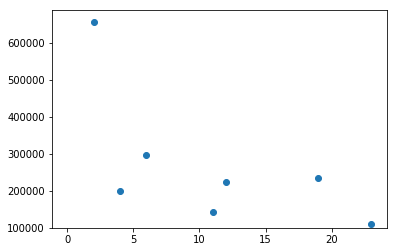

In [414]:
plt.scatter(xh,yd)
plt.ylim(100000)

plt.show()


In [411]:
# Pivot average death over sleep time and strength/mag

eq_g_sp=eq_sd_D.groupby(by=['sleep','Class'],as_index=False).mean()
eq_sp_pvt=eq_g_sp.pivot(index='sleep',columns='Class',values='deaths').fillna(0)
eq_spdth=eq_sp_pvt.reindex_axis(['Minor','Light','Moderate','Strong','Great'],axis=1)
eq_spdth

Class,Minor,Light,Moderate,Strong,Great
sleep,,,,,
False,2.916667,7.333333,91.564593,393.579137,10749.000000
True,4.000000,3.681818,182.694030,813.119048,19211.571429


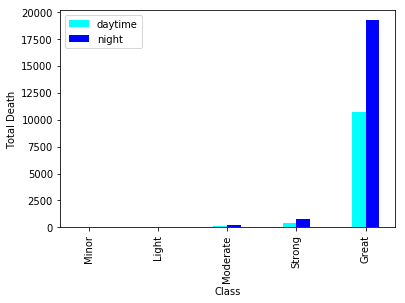

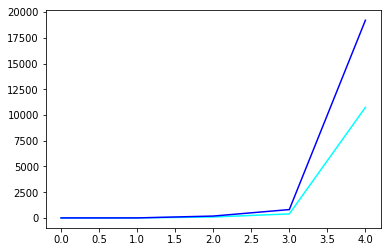

In [408]:
x=np.arange(0,eq_spdth.shape[1])

wdt=.2
y0=np.array(eq_spdth.iloc[0,:])
y1=np.array(eq_spdth.iloc[1,:])

b0=plt.bar(x-0.1,y0,0.2,color='cyan',label='daytime') 
b1=plt.bar(x+0.1,y1,0.2,color='blue',label='night') #spring

plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)
plt.xlabel('Class')
plt.ylabel('Total Death')

plt.legend()
plt.show()


p0=plt.plot(x,y0,color='cyan',label='daytime')
p1=plt.plot(x,y1,color='blue',label='night')
plt.show()

In [409]:
# Pivot total death over sleep time and strength/mag

eq_g_sp=eq_sd_n0.groupby(by=['sleep','Class'],as_index=False).mean()
eq_sp_pvt=eq_g_sp.pivot(index='sleep',columns='Class',values='shaking_death').fillna(0)
eq_spdth=eq_sp_pvt.reindex_axis(['Minor','Light','Moderate','Strong','Great'],axis=1)
eq_spdth

Class,Minor,Light,Moderate,Strong,Great
sleep,,,,,
False,0.0,1.486486,25.313253,405.859060,82.5
True,2.0,2.380952,47.318182,590.421488,1901.0


In [391]:
# Pivot average death over season and strength/mag

eq_g_sn = eq_sd_D.groupby(by=['Season','Class'],as_index=False).mean()
eq_sn_pvt=eq_g_sn.pivot(index='Season',columns='Class',values='deaths').fillna(0)
eq_sndth=eq_sn_pvt.reindex_axis(['Minor','Light','Moderate','Strong','Great'],axis=1)
eq_sndth2=eq_sndth.reindex_axis(['spring','summer','authumn','winter','unknown'],axis=0)

eq_sndth2=eq_sndth2.drop('unknown',0)
eq_sndth2

Class,Minor,Light,Moderate,Strong,Great
Season,,,,,
spring,3.250000,12.105263,180.216867,268.641379,5837.071429
summer,3.750000,3.500000,75.724490,287.495652,1521.500000
authumn,1.666667,3.000000,19.868132,549.546296,2455.375000
winter,3.500000,3.066667,277.442857,1289.428571,35574.625000


In [392]:
np.array(eq_sndth.loc['spring',:])


array([  3.25000000e+00,   1.21052632e+01,   1.80216867e+02,
         2.68641379e+02,   5.83707143e+03])

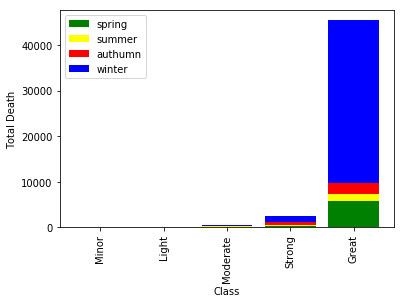

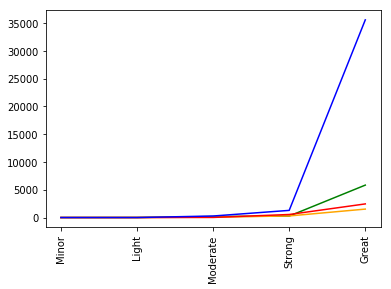

In [415]:
x=np.arange(0,eq_sndth.shape[1])

y0=np.array(eq_sndth.loc['spring',:])
y1=np.array(eq_sndth.loc['summer',:])
y2=np.array(eq_sndth.loc['authumn',:])
y3=np.array(eq_sndth.loc['winter',:])

b0=plt.bar(x,y0,color='green',label='spring') 
b1=plt.bar(x,y1,bottom=y0,color='yellow',label='summer')
b2=plt.bar(x,y2,bottom=y0+y1,color='red',label='authumn')
b3=plt.bar(x,y3,bottom=y0+y1+y2,color='blue',label='winter')



plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)
plt.xlabel('Class')
plt.ylabel('Total Death')

plt.legend()
plt.show()

p0=plt.plot(x,y0,color='green',label='spring')
p1=plt.plot(x,y1,color='orange',label='summer')
p2=plt.plot(x,y2,color='red',label='authumn')
p3=plt.plot(x,y3,color='blue',label='winter')
plt.xticks(x,['Minor','Light','Moderate','Strong','Great'], rotation=90)


plt.show()

##### Here I need to define a widget for countries

In [ ]:
eq_ir=eq_sd_n0[eq_sd_n0['country']=="Iran"]
eq_ir.head(3)

In [ ]:
eq_ir.info()

In [ ]:
eq_ir.groupby(by='decade',as_index=False).count().drop([ 'country','deaths','Season','strength','lat', 'long', 'magnitude', 'shaking_death',
       'year', 'month', 'hour', 'sleep']
      ,1)

In [ ]:
eq_ir.groupby(by='decade',as_index=False).sum()

In [ ]:
eq_ir.groupby(by='strength',as_index=False).mean().drop([ 'lat', 'long', 'magnitude', 'shaking_death',
       'year', 'month', 'decade', 'hour', 'sleep']
      ,1)

In [ ]:
# Pivot average death over season and strength/mag

eq_g_sn = eq_ir.groupby(by=['Season','strength'],as_index=False).mean()
eq_g_sn.pivot(index='Season',columns='strength',values='deaths').fillna(0)
eq_ir.head()

In [ ]:
# Pivot average death over sleep time and strength/mag

eq_g_sp=eq_ir.groupby(by=['sleep','strength'],as_index=False).mean()
eq_g_sp.pivot(index='sleep',columns='strength',values='deaths').fillna(0)


# The demography information is genered [START]

##### Here I import countries' GDP and population density
GDP is available for every year, while population density is updated every 5 years.

In [180]:
# GDP info import

gdp_raw=pd.read_csv("UNdata_Export_20171206_031524973.csv",nrows=10204) #read spreadsheet
gdp_trim = gdp_raw.drop('Value Footnotes',1) #clean extra columns
gdp_trim.columns = ['country' , 'year' ,'GDP'] #rename columns
gdp_trim['country']=gdp_trim['country'].str.strip() # remove spaces

In [181]:
#This block shows the name mismatches
eq_xclud = eq_sd[~eq_sd['country'].isin(gdp_trim['country'])].dropna()
eq_xclud.drop_duplicates(keep='first',subset='country').sort_values(by='country').drop(['origin', 'lat', 'long', 'magnitude', 'shaking_death',
       'deaths', 'year', 'month', 'decade', 'hour', 'Season', 'sleep',
       'strength'],1)

,country,year5
1034,,1995
823,Burma,1985
928,Democratic Republic of the Congo,1990
483,Egypt,1965
1236,Guadeloupe,2000
474,Iran,1965
924,Kyrgyzstan,1990
1300,Martinique,2005
1004,Saudi Arabia/Egypt,1995
504,Taiwan,1970


In [182]:
# The following name corrections are made based on the above finding

def cty_ren(old, new):
    gdp_trim['country'] = gdp_trim['country'].str.replace(old, new)
cty_ren('Myanmar','Burma')
cty_ren('Congo, Dem. Rep.','Democratic Republic of the Congo')
cty_ren('Congo, Rep.','Democratic Republic of the Congo')
cty_ren('Egypt, Arab Rep.','Egypt')
cty_ren('Iran, Islamic Rep.','Iran')
cty_ren('Kyrgyz Republic','Kyrgyzstan')
cty_ren('Venezuela, RB','Venezuela')
cty_ren('Serbia','Yugoslavia')
cty_ren('Yemen, Rep.','Yemen')
gdp_trim['country']=gdp_trim['country'].str.strip()




In [183]:
#Population density import

dens_raw=pd.read_excel("PopulationDensity-20171209125642.xlsx",sheetname='Data',nrows=275,skiprows=1) #read spreadsheet
dens_trim=dens_raw.drop(['ISO 3166-1 numeric code','Note'],1) #remove columns
dens_trim.set_index('Location') #column rename
dens_melt=pd.melt(dens_trim,id_vars=['Location']) #melt column

In [184]:
#cleaning the melted data - density
dens_melt.columns=['country','year5','density']
dens_melt['country']=dens_melt['country'].str.strip() #remove spaces from country name

In [185]:
# find the countries that names appear differently on different sources -density
un_xclud = eq_sd[~eq_sd['country'].isin(dens_melt['country'])].dropna()
un_xclud.drop_duplicates(keep='first', subset='country').sort_values(by='country').drop(['origin', 'lat', 'long', 'magnitude', 'shaking_death',
       'deaths', 'year', 'month', 'decade', 'hour', 'Season', 'sleep',
       'strength'],1)

,country,year5
1034,,1995
759,Bolivia,1985
823,Burma,1985
828,Czech Republic,1985
474,Iran,1965
1004,Saudi Arabia/Egypt,1995
504,Taiwan,1970
1117,Tanzania,2000
506,United States,1970
561,United States Minor Outlying Islands,1975


In [ ]:
def un_ren(old, new):
    dens_melt['country'] = dens_melt['country'].str.replace(old, new)
un_ren('Myanmar','Burma')
un_ren('Bolivia (Plurinational State of)','Bolivia')
un_ren('Czechia','Czech Republic')
un_ren('United Republic of Tanzania','Tanzania')
un_ren('Iran (Islamic Republic of)','Iran')
un_ren('China, Taiwan Province of China','Taiwan')
un_ren('Venezuela (Bolivarian Republic of)','Venezuela')
un_ren('United States of America','United States')
un_ren('Viet Nam','Vietnam')
un_ren('Wallis and Futuna Islands','Wallis and Futuna')
un_ren('Serbia','Yugoslavia')

dens_melt['country']=dens_melt['country'].str.strip()

In [217]:
dens_melt.loc[3101,'country']

'Iran (Islamic Republic of)'

In [193]:
eq_sd.head()

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,strength,year5
1,1900-05-11 17:23,Japan,38.7,141.1,7.0,NaN,NaN,1900,5,1900,2.0,spring,True,7-seven,1900
2,1900-07-12 06:25,Turkey,40.3,43.1,5.9,NaN,140.0,1900,7,1900,8.0,summer,False,5-five,1900
3,1900-10-29 09:11,Venezuela,11.0,-66.0,7.7,NaN,NaN,1900,10,1900,4.0,authumn,True,7-seven,1900
4,1901-02-15 00:00,China,26.0,100.1,6.5,NaN,NaN,1901,2,1900,6.0,winter,False,6-six,1900
5,1901-03-31 07:11,Bulgaria,43.4,28.7,6.4,NaN,4.0,1901,3,1900,8.0,spring,False,6-six,1900


In [196]:
dens_melt[dens_melt['country']=='Iran']

,country,year5,density


In [192]:
#merge density and earthquake
eq_dens=pd.merge(eq_sd , dens_melt , how='left' , on=['country','year5'])
eq_dens[eq_dens['country']=='Iran']

,origin,country,lat,long,magnitude,shaking_death,deaths,year,month,decade,hour,Season,sleep,strength,year5,density
19,1903-09-25 01:20,Iran,35.200,58.200,6.5,NaN,200.0,1903,9,1900,4.0,authumn,True,6-six,1900,NaN
43,1909-01-23,Iran,33.000,50.000,7.3,NaN,8000.0,1909,1,1900,NaN,winter,True,7-seven,1905,NaN
59,1911-04-18 18:14,Iran,32.000,56.000,6.7,NaN,700.0,1911,4,1910,21.0,spring,False,6-six,1910,NaN
115,1923-05-25 22:21,Iran,35.200,59.200,5.7,NaN,2219.0,1923,5,1920,1.0,spring,True,5-five,1920,NaN
118,1923-09-17 07:09,Iran,37.200,57.700,6.4,NaN,157.0,1923,9,1920,10.0,authumn,False,6-six,1920,NaN
119,1923-09-22 20:47,Iran,29.120,56.928,6.9,NaN,290.0,1923,9,1920,23.0,authumn,True,6-six,1920,NaN
130,1925-12-14 00:00,Iran,34.600,58.100,5.5,NaN,500.0,1925,12,1920,3.0,winter,True,5-five,1925,NaN
131,1925-12-18 05:53,Iran,28.500,51.200,5.5,NaN,2.0,1925,12,1920,8.0,winter,False,5-five,1925,NaN
149,1928-08-21 19:01,Iran,37.300,57.900,5.4,NaN,10.0,1928,8,1920,22.0,summer,True,5-five,1925,NaN
157,1929-07-13 07:36,Iran,37.500,58.000,5.8,NaN,5.0,1929,7,1920,10.0,summer,False,5-five,1925,NaN


In [ ]:
un_cty=demo.drop_duplicates(subset='country', keep='first').sort_values(by='country')


un_cty.to_csv(path_or_buf='un_cty.csv', sep=',')

# The demography information is genered [END]

In [ ]:
# Earthquake details and demography info merged; plus a little cleanup.
eq_eco=pd.merge(eq_sd , demo, how='left', on=['country', 'year']).drop('year5',1)

In [ ]:
eq_eco[eq_eco['country']=='Iran']

In [ ]:
# a subset where unknown deaths are removed
eq_sd_D = eq_eco.query('deaths != "NaN"')

In [ ]:
# a subset where unknown shaking deaths are removed
eq_sd_n0 = eq_eco.query('shaking_death != "NaN"')

##### Here I need to define a widget for countries

In [ ]:
eq_ir=eq_sd_n0[eq_sd_n0['country']=="Iran"]
eq_ir.head(3)

In [ ]:
eq_ir.info()

In [ ]:
eq_ir.groupby(by='decade',as_index=False).count().drop([ 'country','deaths','Season','strength','lat', 'long', 'magnitude', 'shaking_death',
       'year', 'month', 'hour', 'sleep']
      ,1)

In [ ]:
eq_ir.groupby(by='decade',as_index=False).sum()

In [ ]:
eq_ir.groupby(by='strength',as_index=False).mean().drop([ 'lat', 'long', 'magnitude', 'shaking_death',
       'year', 'month', 'decade', 'hour', 'sleep']
      ,1)

In [ ]:
# Pivot average death over season and strength/mag

eq_g_sn = eq_ir.groupby(by=['Season','strength'],as_index=False).mean()
eq_g_sn.pivot(index='Season',columns='strength',values='deaths').fillna(0)
eq_ir.head()

In [ ]:
# Pivot average death over sleep time and strength/mag

eq_g_sp=eq_ir.groupby(by=['sleep','strength'],as_index=False).mean()
eq_g_sp.pivot(index='sleep',columns='strength',values='deaths').fillna(0)


# Metrics added
##### Year, month, hour: extracted by slicing the 'oringin' column.
##### Decade: Calculated from the year | Q: How the casaulties trend over time? (worldwide/within countries)
##### Season: deducted from the month, flipped for southern hemisphere (negative latitude) | Q: Do weather condition impact casaulties?
##### Sleep: deducted by hour (UTC converted to local time using longitude) | Q: how different are casaulties in day/night?
##### Strength: Grouping quakes by magnitude (over 8 and below 4 are grouped)
##### To be added: GDP and population density

1. Pivot total death in sleeping time vs regular hours
2. Pivot total death over season
3. plot the ratio of shaking death to total vs GDP (are wealthier countries prepared better?)
4. plot population density over death